In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Dataset
df = pd.read_csv('Motor_Vehicle_Collisions.csv', parse_dates=['CRASH DATE'], dtype={'ZIP CODE': str})
print(df.head())

  CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0 2021-09-11       2:39       NaN      NaN       NaN        NaN   
1 2022-03-26      11:45       NaN      NaN       NaN        NaN   
2 2023-11-01       1:29  BROOKLYN    11230  40.62179 -73.970024   
3 2022-06-29       6:55       NaN      NaN       NaN        NaN   
4 2022-09-21      13:21       NaN      NaN       NaN        NaN   

                 LOCATION           ON STREET NAME CROSS STREET NAME  \
0                     NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                     NaN  QUEENSBORO BRIDGE UPPER               NaN   
2  (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                     NaN       THROGS NECK BRIDGE               NaN   
4                     NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                    Unspecified   
1             NaN  ...                            

In [ ]:
df.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)

#Extracting Hour & Weekday
df['Hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour
df['Weekday'] = df['CRASH DATE'].dt.day_name()

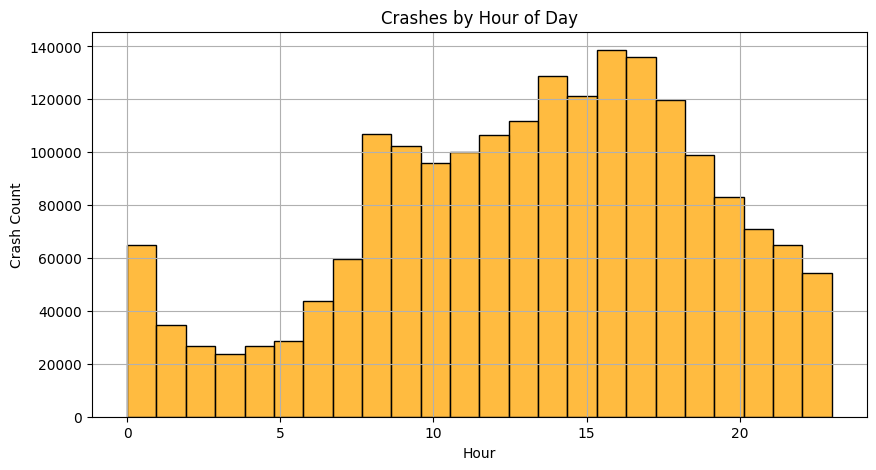

In [ ]:
# Crashes by Hour
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, color='orange', kde=False)
plt.title("Crashes by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Crash Count")
plt.grid(True)
plt.show()

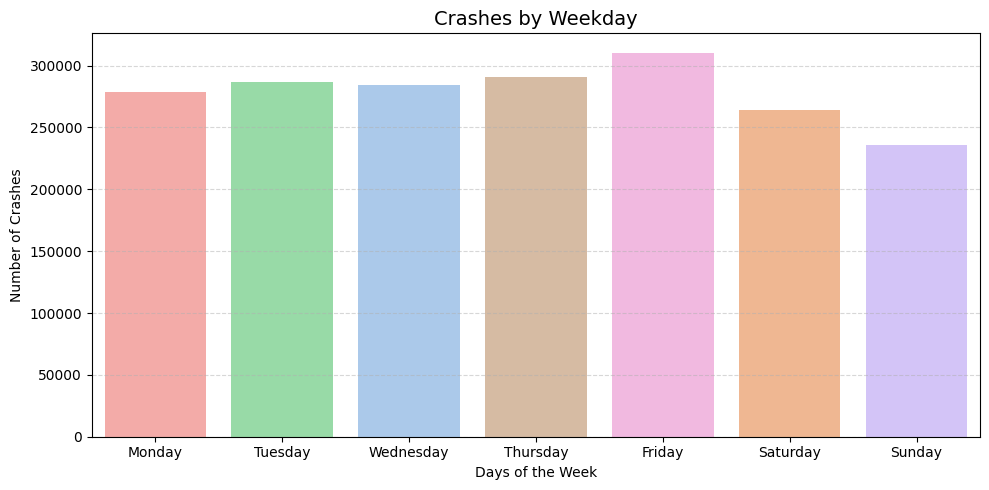

In [ ]:
#Crashes by weekdays
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['Weekday'] = df['CRASH DATE'].dt.day_name()
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Weekday', data=df, order=order, palette='pastel', hue='Weekday', legend=False)
plt.title("Crashes by Weekday", fontsize=14)
plt.xlabel("Days of the Week")
plt.ylabel("Number of Crashes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

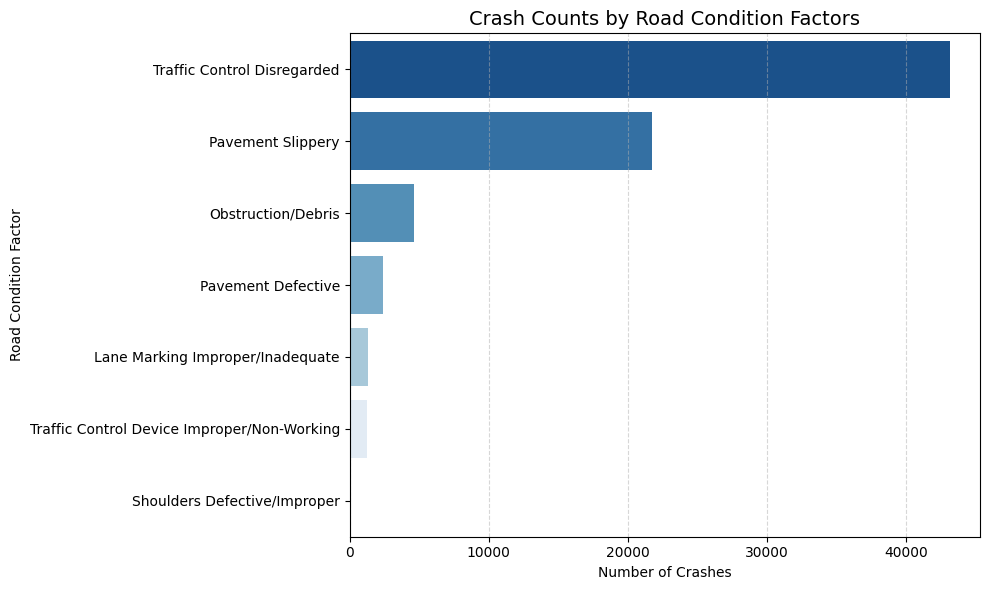

In [ ]:
#Crash Counts by Road Condition Factors
road_factors = [
    'Pavement Slippery',
    'Pavement Defective',
    'Lane Marking Improper/Inadequate',
    'Obstruction/Debris',
    'Shoulders Defective/Improper',
    'Traffic Control Device Improper/Non-Working',
    'Traffic Control Disregarded'
]
df.replace({
    'Illnes': 'Illness',
    'Drugs (illegal)': 'Drugs (Illegal)',
    'Cell Phone (hand-Held)': 'Cell Phone (hand-held)'
}, inplace=True)

contrib_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

melted_factors = df[contrib_cols].melt(value_name='factor').drop('variable', axis=1)

# Filtering only road-related
road_df = melted_factors[melted_factors['factor'].isin(road_factors)].dropna()
plt.figure(figsize=(10,6))
sns.countplot(data=road_df, y='factor', order=road_df['factor'].value_counts().index, palette='Blues_r', hue='factor', legend=False)
plt.title("Crash Counts by Road Condition Factors", fontsize=14)
plt.xlabel("Number of Crashes")
plt.ylabel("Road Condition Factor")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

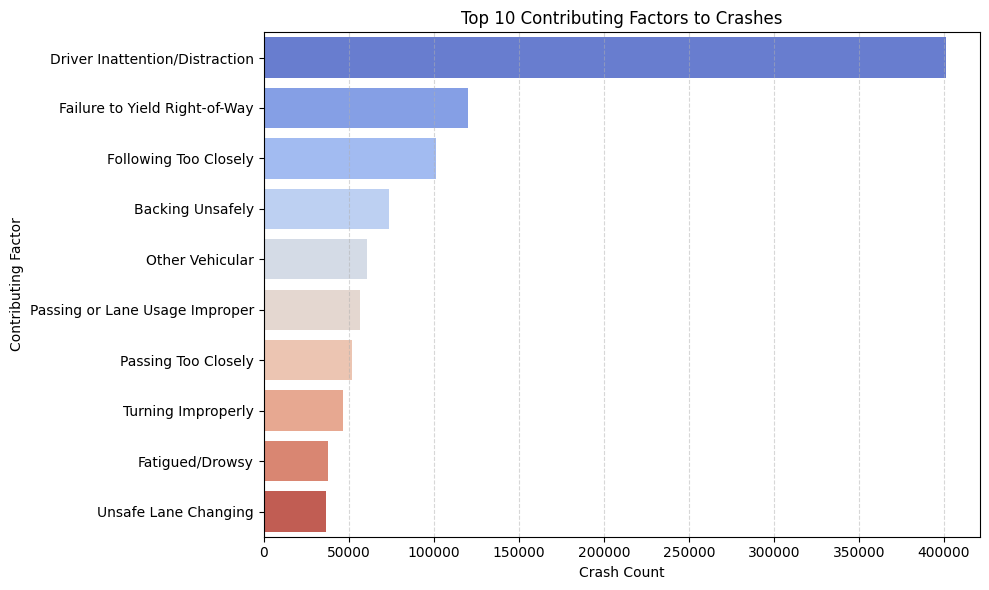

In [ ]:
top_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].dropna()
top_factors = top_factors[top_factors != 'Unspecified']

top10_factors = top_factors.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_factors.values, y=top10_factors.index, palette='coolwarm', hue=top10_factors.index, legend=False)
plt.title("Top 10 Contributing Factors to Crashes")
plt.xlabel("Crash Count")
plt.ylabel("Contributing Factor")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

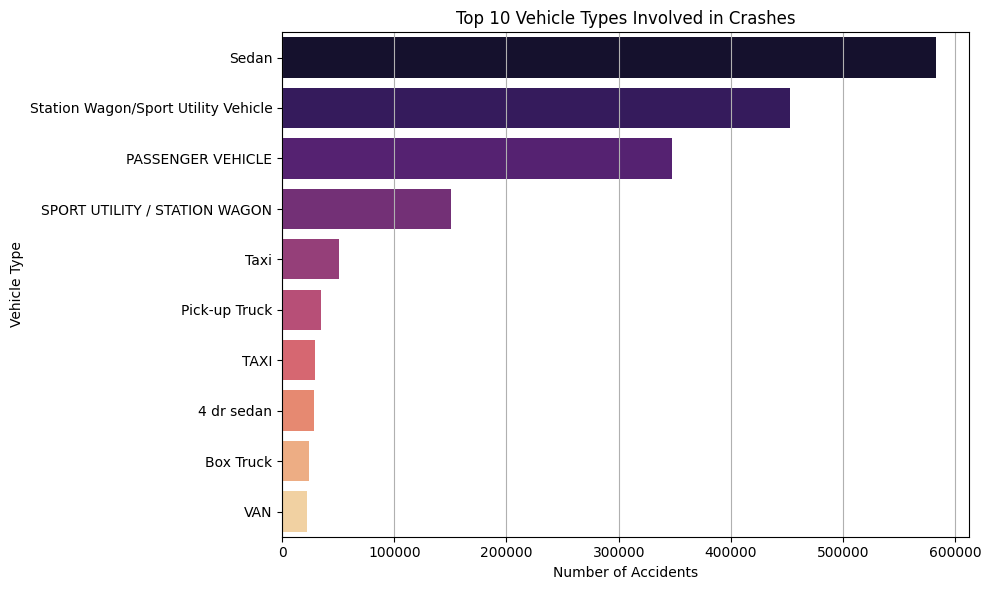

In [ ]:
#Types of vehicles involved
vehicle_counts = df['VEHICLE TYPE CODE 1'].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=vehicle_counts.values, y=vehicle_counts.index, palette='magma', hue=vehicle_counts.index, legend=False)
plt.title("Top 10 Vehicle Types Involved in Crashes")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

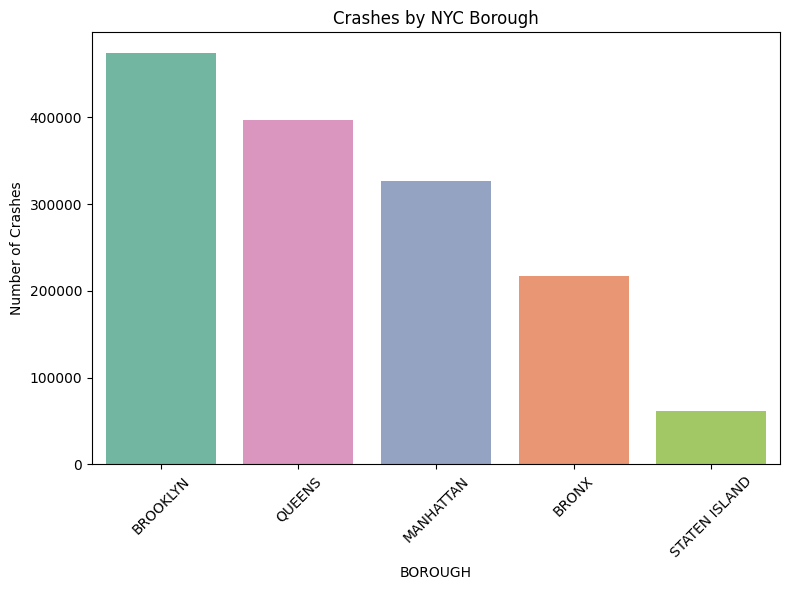

In [ ]:
#Crashes by borough
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='BOROUGH', order=df['BOROUGH'].value_counts().index, palette='Set2', hue='BOROUGH', legend=False)
plt.title("Crashes by NYC Borough")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Heatmap of NYC Traffic Accidents (2021–2023)
import plotly.express as px
import numpy as np

import pandas as pd
# Loading Dataset
df = pd.read_csv('Motor_Vehicle_Collisions.csv', parse_dates=['CRASH DATE'], dtype={'ZIP CODE': str})


px.set_mapbox_access_token("pk.eyJ1IjoiYWxhbWFzaHJhZiIsImEiOiJjbWN4aTVzenowNmt0Mm1xdWVoZ3llc3U0In0.AtWf-9F9l4B_HEX8tzYF1w")

sample = df[['LATITUDE', 'LONGITUDE']].dropna().sample(3000, random_state=1)

sample['LATITUDE'] += np.random.uniform(-0.0005, 0.0005, sample.shape[0])
sample['LONGITUDE'] += np.random.uniform(-0.0005, 0.0005, sample.shape[0])

fig = px.density_mapbox(
    sample,
    lat='LATITUDE',
    lon='LONGITUDE',
    radius=12,
    zoom=10,
    center={"lat": 40.7128, "lon": -74.0060},
    mapbox_style="dark",
    color_continuous_scale="inferno",
    title="NYC Traffic Accident Hotspots (2021–2023)"
)


fig.update_layout(
    title_font_size=22,
    title_font_color='white',
    title_x=0.5,
    height=600,
    width=1000,
    margin={"r":0,"t":50,"l":0,"b":0},
    paper_bgcolor="black",
    font_color="white"
)


fig.show()

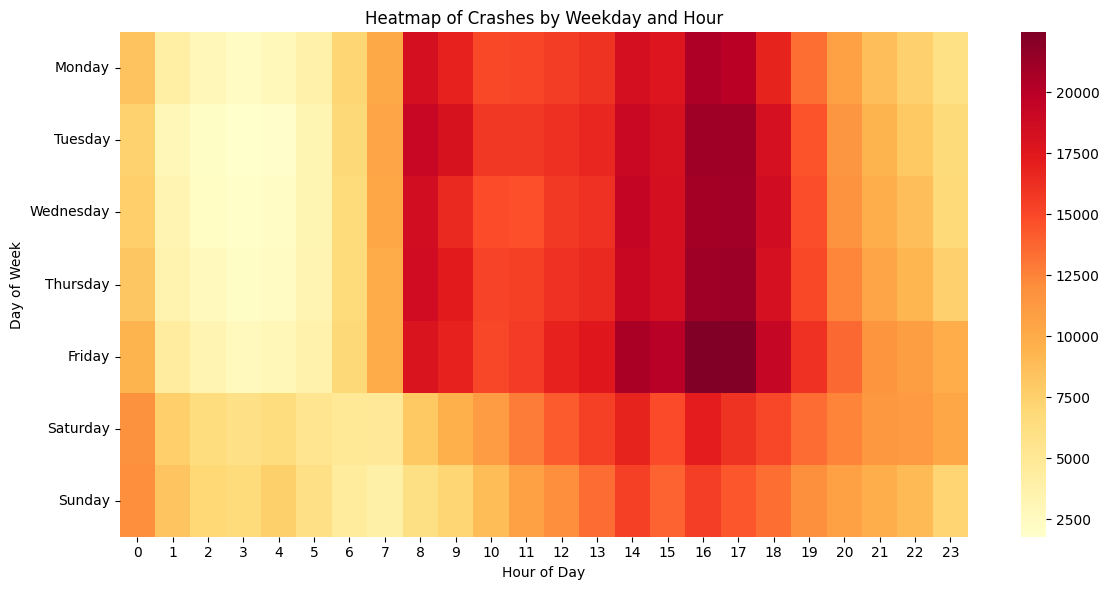

In [ ]:
#Heatmap of crashes by weekday and hour
df['Hour'] = pd.to_datetime(df['CRASH TIME'], errors='coerce').dt.hour
df['Weekday'] = pd.to_datetime(df['CRASH DATE'], errors='coerce').dt.day_name()

heatmap_data = pd.crosstab(df['Weekday'], df['Hour'])
heatmap_data = heatmap_data.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Heatmap of Crashes by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


In [ ]:
#Injury Severity of Traffic Accidents in NYC (2021–2023)
severe = df[df['NUMBER OF PERSONS INJURED'] > 0].copy()
severe = severe[['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED']].dropna()

fig = px.scatter_mapbox(
    severe.sample(1000, random_state=42),
    lat="LATITUDE",
    lon="LONGITUDE",
    size="NUMBER OF PERSONS INJURED",
    color="NUMBER OF PERSONS INJURED",
    color_continuous_scale="YlOrRd",
    size_max=30,
    zoom=10.5,
    center={"lat": 40.7128, "lon": -74.0060},
    mapbox_style="carto-positron",
    title="Injury Severity of Traffic Accidents in NYC (2021–2023)"
)

fig.update_layout(
    title_font_size=20,
    title_font_color='darkred',
    title_x=0.5,
    height=700,
    width=1100,
    margin=dict(r=0, t=60, l=0, b=0),
    font=dict(family="Arial", color="black", size=12),
    coloraxis_colorbar=dict(
        title="Injuries",
        ticks="outside",
        tickvals=[1, 2, 3, 4, 5],
        lenmode="pixels",
        len=300,
        thickness=15,
    )
)

fig.show()